In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore") 

# <font color = 'red'> ЛР 4. Предварительная обработка признаков. Простейший линейный классификатор - логистическая регрессия. </font>

Сложность: <font color = 'green'> Легко  </font>.

Дата составления: 10.10.2023

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Предварительная обработка признаков.  </font>

<font color = 'red' size = 5>Задание 1 </font>

1. Изучите примеры точечной работы с признаками в исходных данных из файла *LR4Pr_1(Features)*. 
2. Поработав в документацией и примерами проведите отбор и подготовку признаков из файла telecom.csv.
        2.1 Визуализируйте признаки.
        2.2 Удалите аномальные данные, где необходимо.
        2.3 Определите важные признаки с помощью описательной статитсики и корреляции.
        2.4 Заполните пропуски и поработайте с данными по своему усмотрению.
        2.5 Подготовленный датасет сохраните в новый csv файл.
        


[https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)


In [219]:
data = pd.read_csv('telecom.csv')

In [220]:
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [221]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [222]:
data['churn']=data['churn'].astype('int64')

In [223]:
data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [224]:
data['churn'].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [225]:
data[data['churn'] == 1]

state  account length  area code phone number international plan  \
10      IN              65        415     329-6603                 no   
15      NY             161        415     351-7269                 no   
21      CO              77        408     393-7984                 no   
33      AZ              12        408     360-1596                 no   
41      MD             135        408     383-6029                yes   
...    ...             ...        ...          ...                ...   
3301    CA              84        415     417-1488                 no   
3304    IL              71        510     330-7137                yes   
3320    GA             122        510     411-5677                yes   
3322    MD              62        408     409-1856                 no   
3323    IN             117        415     362-5899                 no   

     voice mail plan  number vmail messages  total day minutes  \
10                no                      0              129.1   
15                no                      0              332.9   
21                no                      0               62.4   
33                no                      0              249.6   
41               yes                     41              173.1   
...              ...                    ...                ...   
3301              no                      0              280.0   
3304              no                      0              186.1   
3320              no                      0              140.0   
3322              no                      0              321.1   
3323              no                      0              118.4   

      total day calls  total day charge  ...  total eve calls  \
10                137             21.95  ...               83   
15                 67             56.59  ...               97   
21                 89             10.61  ...              121   
33                118             42.43  ...              119   
41                 85             29.43  ...              107   
...               ...               ...  ...              ...   
3301              113             47.60  ...               90   
3304              114             31.64  ...              140   
3320              101             23.80  ...               77   
3322              105             54.59  ...              122   
3323              126             20.13  ...               97   

      total eve charge  total night minutes  total night calls  \
10               19.42                208.8                111   
15               27.01                160.6                128   
21               14.44                209.6                 64   
33               21.45                280.2                 90   
41               17.33                122.2                 78   
...                ...                  ...                ...   
3301             17.19                156.8                103   
3304             16.88                206.5                 80   
3320             16.69                120.1                133   
3322             22.57                180.5                 72   
3323             21.19                227.0                 56   

      total night charge  total intl minutes  total intl calls  \
10                  9.40                12.7                 6   
15                  7.23                 5.4                 9   
21                  9.43                 5.7                 6   
33                 12.61                11.8                 3   
41                  5.50                14.6                15   
...                  ...                 ...               ...   
3301                7.06                10.4                 4   
3304                9.29                13.8                 5   
3320                5.40                 9.7                 4   
3322                8.12                11.5                 2   
3323               10.22           

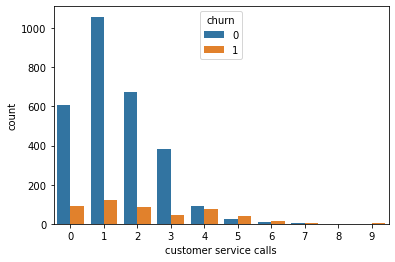

In [83]:
sns.countplot(x='customer service calls', hue='churn', data=data);

In [226]:
d = {'no' : 0, 'yes' : 1}
data['international plan'] = data['international plan'].map(d)

data['voice mail plan'] = data['voice mail plan'].map(d)

In [227]:
data.head()

state  account length  area code phone number  international plan  \
0    KS             128        415     382-4657                   0   
1    OH             107        415     371-7191                   0   
2    NJ             137        415     358-1921                   0   
3    OH              84        408     375-9999                   1   
4    OK              75        415     330-6626                   1   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0  

[5 rows x 21 columns]

In [86]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

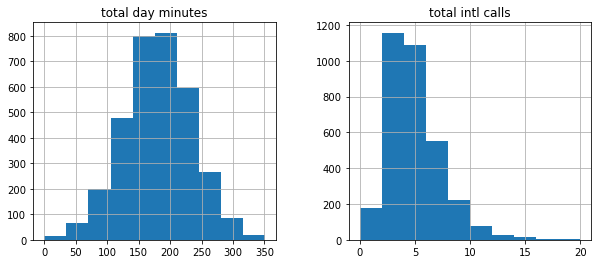

In [87]:
features = ['total day minutes', 'total intl calls']
data[features].hist(figsize=(10,4));

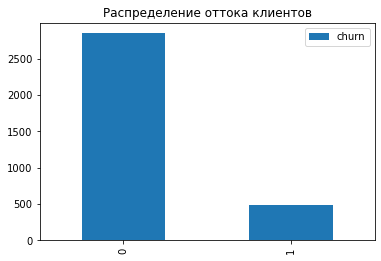

In [88]:
data['churn'].value_counts().plot(kind='bar', label='churn')
plt.legend()
plt.title('Распределение оттока клиентов');

In [91]:
corr_matrix = data.drop(['state', 'international plan', 'voice mail plan',
                      'area code'], axis=1).corr()

In [92]:
corr_matrix

account length  number vmail messages  \
account length                1.000000              -0.004628   
number vmail messages        -0.004628               1.000000   
total day minutes             0.006216               0.000778   
total day calls               0.038470              -0.009548   
total day charge              0.006214               0.000776   
total eve minutes            -0.006757               0.017562   
total eve calls               0.019260              -0.005864   
total eve charge             -0.006745               0.017578   
total night minutes          -0.008955               0.007681   
total night calls            -0.013176               0.007123   
total night charge           -0.008960               0.007663   
total intl minutes            0.009514               0.002856   
total intl calls              0.020661               0.013957   
total intl charge             0.009546               0.002884   
customer service calls       -0.003796              -0.013263   
churn                         0.016541              -0.089728   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl charge               -0.011067         0.008674         -0.011074   
customer service calls          -0.012985         0.002423         -0.012987   
churn                            0.092796         0.009233          0.092786   

                        total night minutes  total night calls  \
account length                    -0.008955          -0.013176   
number vmail messages              0.007681           0.007123  

In [93]:
data['intensive_service_calls_Q'] = (data['customer service calls'] > 3).astype('int')

pd.crosstab(data['intensive_service_calls_Q'], data['churn'], margins=True)

churn                         0    1   All
intensive_service_calls_Q                 
0                          2721  345  3066
1                           129  138   267
All                        2850  483  3333

In [228]:
corr_matrix = data.drop(features, axis=1).corr()

In [229]:
corr_matrix

account length  area code  international plan  \
account length                1.000000  -0.012463            0.024735   
area code                    -0.012463   1.000000            0.048551   
international plan            0.024735   0.048551            1.000000   
voice mail plan               0.002918  -0.000747            0.006006   
number vmail messages        -0.004628  -0.001994            0.008745   
total day calls               0.038470  -0.009646            0.003755   
total day charge              0.006214  -0.008264            0.049398   
total eve minutes            -0.006757   0.003580            0.019100   
total eve calls               0.019260  -0.011886            0.006114   
total eve charge             -0.006745   0.003607            0.019106   
total night minutes          -0.008955  -0.005825           -0.028905   
total night calls            -0.013176   0.016522            0.012451   
total night charge           -0.008960  -0.005845           -0.028913   
total intl minutes            0.009514  -0.018288            0.045871   
total intl charge             0.009546  -0.018395            0.045780   
customer service calls       -0.003796   0.027572           -0.024522   
churn                         0.016541   0.006174            0.259852   

                        voice mail plan  number vmail messages  \
account length                 0.002918              -0.004628   
area code                     -0.000747              -0.001994   
international plan             0.006006               0.008745   
voice mail plan                1.000000               0.956927   
number vmail messages          0.956927               1.000000   
total day calls               -0.011086              -0.009548   
total day charge              -0.001686               0.000776   
total eve minutes              0.021545               0.017562   
total eve calls               -0.006444              -0.005864   
total eve charge               0.021559               0.017578   
total night minutes            0.006079               0.007681   
total night calls              0.015553               0.007123   
total night charge             0.006064               0.007663   
total intl minutes            -0.001318               0.002856   
total intl charge             -0.001276               0.002884   
customer service calls        -0.017824              -0.013263   
churn                         -0.102148              -0.089728   

                        total day calls  total day charge  total eve minutes  \
account length                 0.038470          0.006214          -0.006757   
area code                     -0.009646         -0.008264           0.003580   
international plan             0.003755          0.049398           0.019100   
voice mail plan               -0.011086         -0.001686           0.021545   
number vmail messages         -0.009548          0.000776           0.017562   
total day calls                1.000000          0.006753          -0.021451   
total day charge               0.006753          1.000000           0.007050   
total eve minutes             -0.021451          0.007050           1.000000   
total eve calls                0.006462          0.015769          -0.011430   
total eve charge              -0.021449          0.007036           1.000000   
total night minutes            0.022938          0.004324          -0.012584   
total night calls             -0.019557          0.022972           0.007586   
total night charge             0.022927          0.004301          -0.012593   
total intl minutes             0.021565         -0.010157          -0.011035   
total intl charge              0.021666         -0.010094          -0.011067   
customer service calls        -0.018942         -0.013427          -0.012985   
churn                          0.018459          0.205151           0.092796   

                        total eve calls  total eve charge  \
account length    

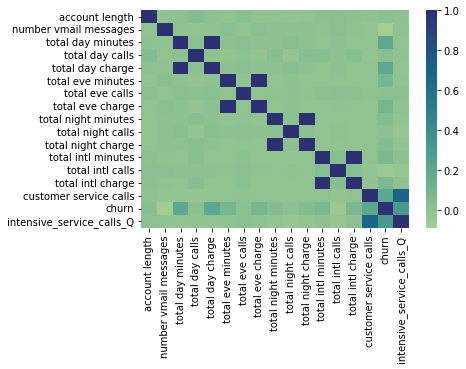

In [22]:
sns.heatmap(corr_matrix,cmap="crest");

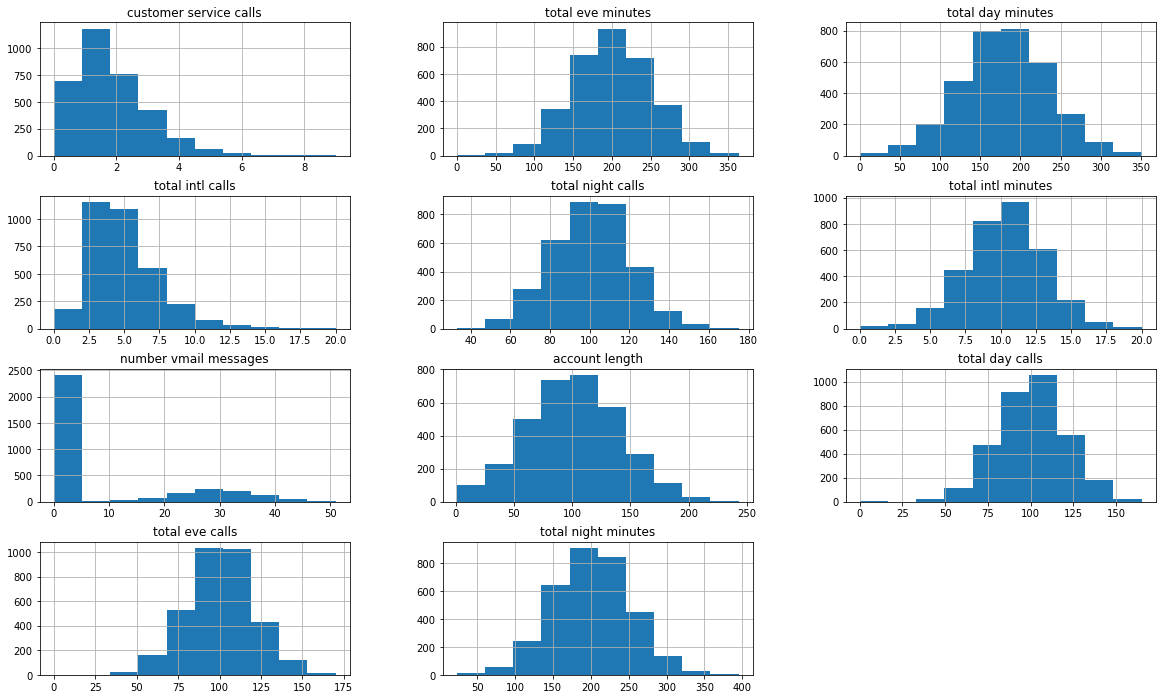

In [232]:
features = list(set(data.columns) - set(['state', 'international plan', 'voice mail plan',  'area code',
                                      'total day charge',   'total eve charge',   'total night charge',
                                        'total intl charge', 'churn','intensive_service_calls_Q','phone number']))
data[features].hist(figsize=(20,12));

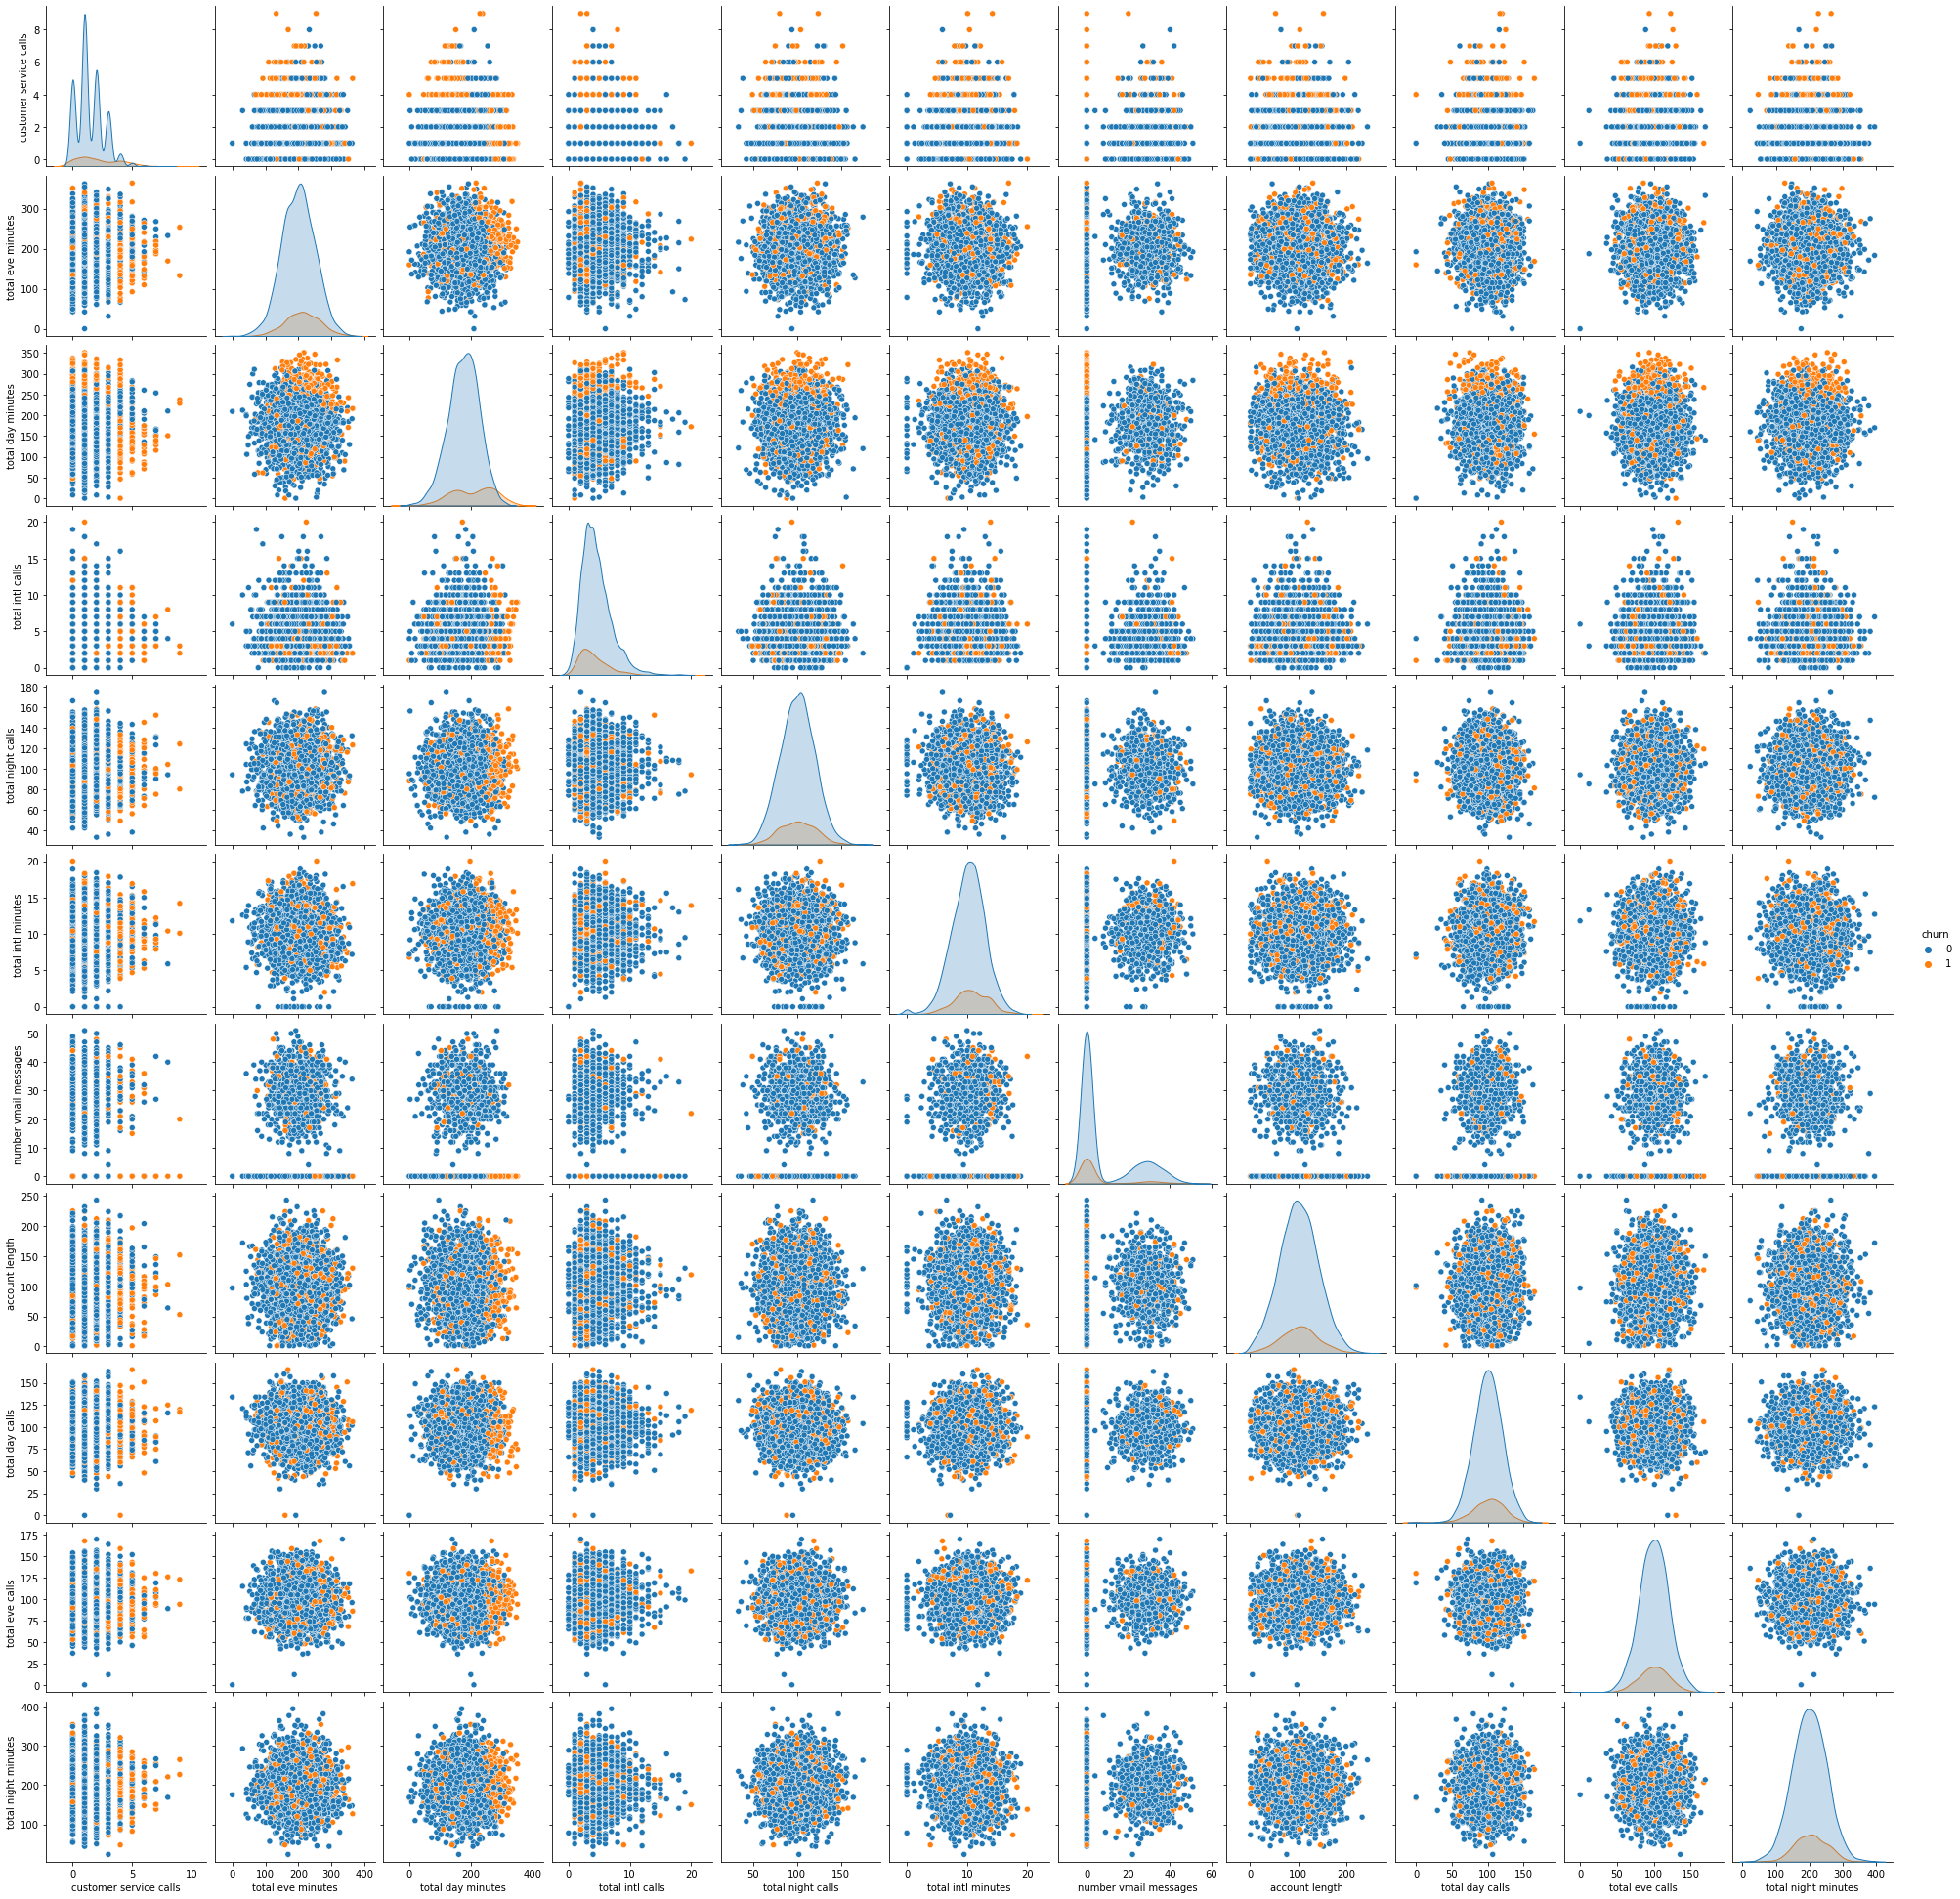

In [24]:
sns.pairplot(data[features + ['churn']], hue='churn');

In [230]:
features

['total day minutes', 'total intl calls']

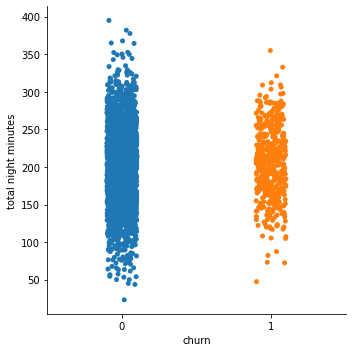

In [27]:
sns.catplot(x='churn', y = 'total night minutes',data=data)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


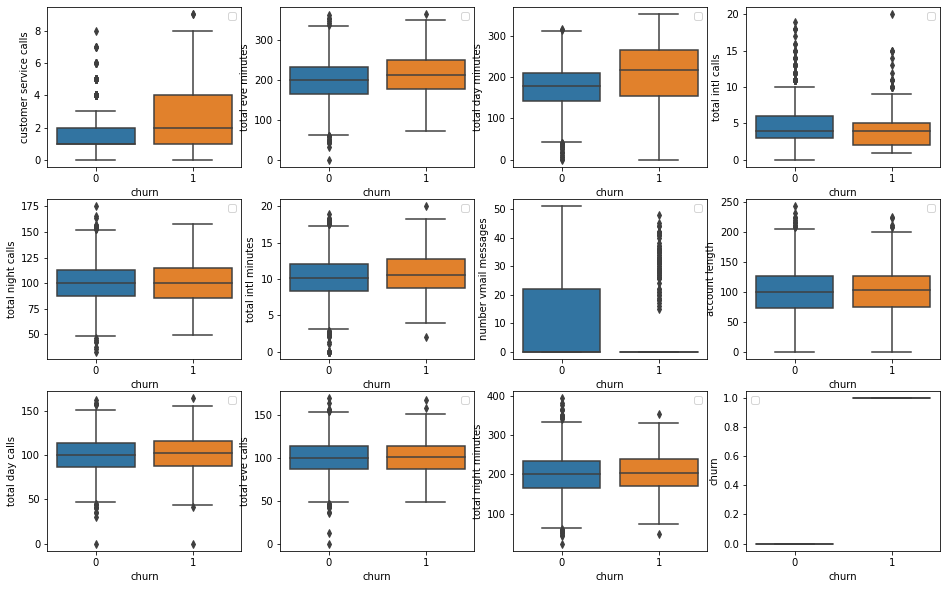

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features+['churn']):
    sns.boxplot(x='churn', y=feat, data=data, ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlabel('churn')
    axes[idx // 4, idx % 4].set_ylabel(feat);

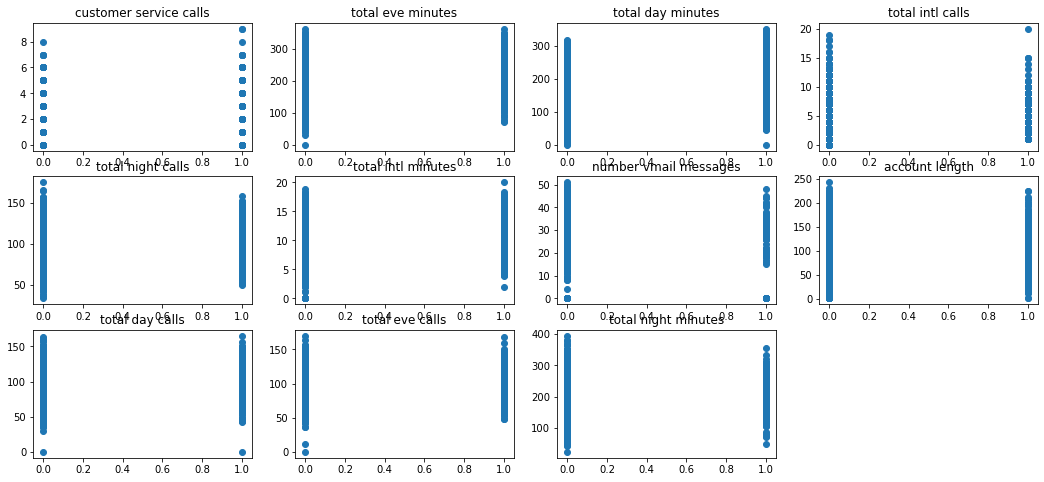

In [38]:
plt.figure(figsize=(18, 8))
for i, col in enumerate(features):
    plt.subplot(3, 4, i+1)
    plt.scatter( data['churn'],data[col])
    plt.title(col)

In [235]:
features = ['state', 'international plan', 'voice mail plan',  'area code',
                                      'total day charge',   'total eve charge',   'total night charge',
                                        'total intl charge','phone number']

In [236]:
data.drop(features, axis=1, inplace=True)

In [237]:
data

account length  number vmail messages  total day minutes  \
0                128                     25              265.1   
1                107                     26              161.6   
2                137                      0              243.4   
3                 84                      0              299.4   
4                 75                      0              166.7   
...              ...                    ...                ...   
3328             192                     36              156.2   
3329              68                      0              231.1   
3330              28                      0              180.8   
3331             184                      0              213.8   
3332              74                     25              234.4   

      total day calls  total eve minutes  total eve calls  \
0                 110              197.4               99   
1                 123              195.5              103   
2                 114              121.2              110   
3                  71               61.9               88   
4                 113              148.3              122   
...               ...                ...              ...   
3328               77              215.5              126   
3329               57              153.4               55   
3330              109              288.8               58   
3331              105              159.6               84   
3332              113              265.9               82   

      total night minutes  total night calls  total intl minutes  \
0                   244.7                 91                10.0   
1                   254.4                103                13.7   
2                   162.6                104                12.2   
3                   196.9                 89                 6.6   
4                   186.9                121                10.1   
...                   ...                ...                 ...   
3328                279.1                 83                 9.9   
3329                191.3                123                 9.6   
3330                191.9                 91                14.1   
3331                139.2                137                 5.0   
3332                241.4                 77                13.7   

      total intl calls  customer service calls  churn  
0                    3                       1      0  
1                    3                       1      0  
2                    5                       0      0  
3                    7                       2      0  
4                    3                       3      0  
...                ...                     ...    ...  
3328                 6                       2      0  
3329                 4                       3      0  
3330                 6                       2      0  
3331                10                       2      0  
3332                 4                       0      0  

[3333 rows x 12 columns]

In [238]:
data.to_csv('telecom_output.csv', index=False)

## <font color = 'green'> 2. Логистическая регрессия.  </font>

**Логистическая регрессия** - модель машинного обучения для линейной классификации данных. Основная идея состоит в вычислении вероятности попадания объекта в один из двух классов(в случае бинарной классификации) и последующей классификации этого объекта с помощью порога вероятности.

Общий алгоритм можно описать так. 

1. Вычисляем зачение функции-регрессора для заданной функции $reg = \overline{w}^{T}\overline{x}$.
2. Вычисляем вероятность попадания в класс "1"  $p_{1} = \frac{1}{1+e^{-reg}}$.
3. Классифицируем объект в класс "1" в случае если $p_{1}>0.5$ (хотя порог можно взять другим) и в класс "0" в противоположном случае.

Подробнее изучить можно в конспекте лекции и по [ссылке](https://habr.com/ru/articles/485872/).

[[ 14.3675117  -14.42417298]]


array([1.87588241])

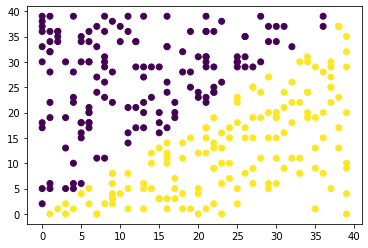

In [43]:
X_data = np.random.randint(0,40,(300,2))
rows = np.where(X_data[:,0]!=X_data[:,1])
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0]-elem[1])==1) for elem in X_data])

plt.scatter(X_data[:,0],X_data[:,1],c = y_data);

inner_model = LogisticRegression(penalty='none')
inner_model.fit(X_data, y_data)

inner_preds = inner_model.predict(X_data)
inner_preds_pr = inner_model.predict_proba(X_data)
 # accuracy
(inner_preds == y_data).mean()

inner_preds_pr

print(inner_model.coef_)

inner_model.intercept_

<font color = 'red' size = 5>Задание 2 </font>

1. Реализуйте собственные методы для классификации данных методом логистической регрессии. Для минимизации функции потерь используйте градиентный спуск. 
2. Протестируйте ваш метод на искуственных данных. Сравните с работой встроенной функции. 
3. Графически изобразите результаты классификации. Изобразите разделяющую гиперплоскость или кривую.
4. Попробуйте подобрать данные, которые станут проблемой (покажут низкое качество на валидации) для описанной модели.

In [15]:
X_data = np.random.randint(0, 40, (10, 1))
#rows = np.where(X_data[:, 0] != X_data[:, 1])
#X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0]) == 1) for elem in X_data])

In [16]:
X_data.shape

(10, 1)

In [17]:
y_data.shape

(10,)

In [20]:

X_data.shape[1]

1

In [19]:
y_data 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
w = np.zeros(1)
w

array([0.])

In [24]:
np.dot(X_data, w)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
1 / (1 + np.exp(-np.dot(X_data, w)))

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [26]:
np.exp(-np.dot(X_data, w))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
1 / (1 + np.exp(-np.dot(X_data, w))) - y_data

array([-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5])

In [31]:
(1/ 10)* np.dot(X_data.T, 1 / (1 + np.exp(-np.dot(X_data, w))) - y_data)

array([-10.2])

In [60]:
def reg(w, x):
    return np.dot(x, w)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def probability(w, x):
    return sigmoid(reg(w, x))

In [61]:
def penalty(w, x, y):
    n = x.shape[0]
    return -(1 / n) * np.sum(y * np.log(probability(w, x)) + (1 - y) * np.log(1 - probability(w, x)))
    
def gradient(w, x, y):
    n = x.shape[0]
    return (1 / n) * np.dot(x.T, sigmoid(reg(w, x)) - y)

In [246]:
def fit(x, y, lrn_rate = 0.01, num_iterations = 1000):
    x = np.insert(x, 0, 1, axis=1)
    num_features = x.shape[1]
    w = np.zeros(num_features)
    
    for _ in range(num_iterations):
        grad = gradient(w, x, y)
        w -= lrn_rate * grad
    
    return w

def predict(x, w):
    X = np.insert(x, 0, 1, axis=1)
    probabilities = probability(w, X)
    predictions = np.round(probabilities)
    return predictions

def score(X, y, w):
    predictions = predict(X, w)
    return np.mean(predictions == y)

Разобраться с параметрами функции logisticregression

1. penalty (l1, l2, elasticnet, none, defsault = l2) - Определяет тип регуляризации

2. С (default = 1.0) - обратный коэффициент регуляризации (контролирует штраф за сложность модели)

3. fit_intercept (default = True) - должен ли добавляться свободный член 

4. max_iter (default = 100) - максимальное количество итераций, которые оптимизационный алгоритм может выполнить при поиске оптимальных весов

5. solver (newton-cg, lbfgs, liblinear, sag, saga; default = lbfgs) - метод, используемый для оптимизации функции потерь.

'newton-cg': Алгоритм Ньютона-Крылова.

'lbfgs': Оптимизация методом Л-БФГС (Limited-memory Broyden–Fletcher–Goldfarb–Shanno).

'liblinear': Оптимизация методом liblinear.

'sag': Стохастический градиентный спуск.

'saga': Улучшенная версия стохастического градиентного спуска.

6. random_state (RandomState instance, default = None) - начальное состояние

7. class_weight () - позволяет учесть неравномерные доли классов в данных. Если есть дисбаланс классов, можно передать class_weight = balanced и библиотека автоматически вычислит веса для каждого класса, обратно пропорционально частоте класса

8. verbose (default = 0) - определяет уровень детализации вывода. Чем больше значение, тем больше информации будет выводиться в процессе обучения.



In [252]:
X_data = np.random.randint(0, 40, (300, 2))
rows = np.where(X_data[:, 0] != X_data[:, 1])
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0] - elem[1]) == 1) for elem in X_data])

learning_rate = 0.1
num_iterations = 1000
weights = fit(X_data, y_data, lrn_rate=learning_rate, num_iterations=num_iterations)

print(weights)

accuracy_custom = score(X_data, y_data, weights)


sklearn_model = LogisticRegression(random_state=42)
sklearn_model.fit(X_data, y_data)

print(sklearn_model.intercept_,sklearn_model.coef_)

accuracy_sklearn = sklearn_model.score(X_data, y_data)

print(f"Точность: {accuracy_custom:.2f}")
print(f"Точность модели из scikit-learn: {accuracy_sklearn:.2f}")

[-0.16172311  1.91604612 -1.91636523]
[-0.69285695] [[ 1.73118366 -1.71063267]]
Точность: 1.00
Точность модели из scikit-learn: 1.00


Вывести веса. Сравнить со встроенной

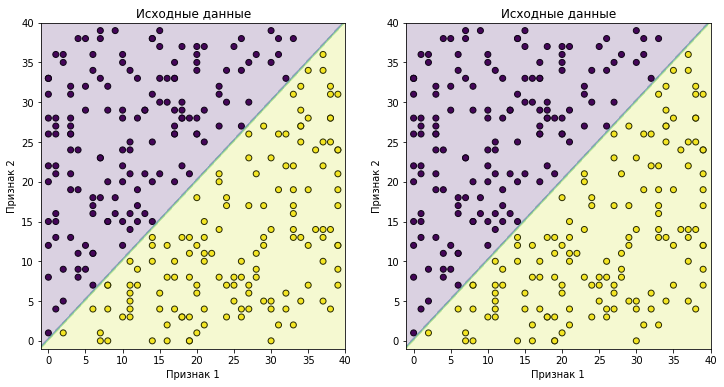

In [71]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap='viridis', edgecolors='k', linewidth=1)
plt.title("Исходные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

xx, yy = np.meshgrid(np.linspace(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1, 100),
                     np.linspace(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1, 100))
Z = predict(np.c_[xx.ravel(), yy.ravel()], weights).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.xlim(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1)
plt.ylim(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1)

plt.subplot(1, 2, 2)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap='viridis', edgecolors='k', linewidth=1)
plt.title("Исходные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

Z_sklearn = sklearn_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z_sklearn, alpha=0.2, cmap='viridis')
plt.xlim(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1)
plt.ylim(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1)

plt.show()

Градиентный спуск с переменным шагом

In [277]:
def reg(w, x):
    return np.dot(x, w)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def probability(w, x):
    return sigmoid(reg(w, x))

def penalty(w, x, y):
    n = x.shape[0]
    return -(1 / n) * np.sum(y * np.log(probability(w, x)) + (1 - y) * np.log(1 - probability(w, x)))
    
def gradient(w, x, y):
    n = x.shape[0]
    return (1 / n) * np.dot(x.T, sigmoid(reg(w, x)) - y)

# Adaptive Gradient Descent
def fit(x, y, lrn_rate = 0.01, num_iterations = 1000, epsilon=1e-8):
    x = np.insert(x, 0, 1, axis=1)
    num_features = x.shape[1]
    w = np.zeros(num_features)
    squared_gradients_sum = np.zeros(num_features) + epsilon            
    
    for _ in range(num_iterations):
        grad = gradient(w, x, y)
        squared_gradients_sum += grad ** 2
        adaptive_lrn_rate = lrn_rate / np.sqrt(squared_gradients_sum)
        w -= adaptive_lrn_rate * grad       
    
    return w

def predict(x, w):
    X = np.insert(x, 0, 1, axis=1)
    probabilities = probability(w, X)
    predictions = np.round(probabilities)
    return predictions

def score(X, y, w):
    predictions = predict(X, w)
    return np.mean(predictions == y)

In [270]:
def fit(x, y, lrn_rate=0.01, num_iterations=1000, decay_rate=0.9):
    x = np.insert(x, 0, 1, axis=1)
    num_features = x.shape[1]
    w = np.zeros(num_features)
    
    for iteration in range(1, num_iterations + 1):
        grad = gradient(w, x, y)
        w -= lrn_rate * grad
        
        # Уменьшение learning rate с каждой итерацией
        lrn_rate *= decay_rate
    
    return w

In [278]:
X_data = np.random.randint(0, 40, (300, 2))
rows = np.where(X_data[:, 0] != X_data[:, 1])
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0] - elem[1]) == 1) for elem in X_data])

learning_rate = 0.1
num_iterations = 1000
weights = fit(X_data, y_data, lrn_rate=learning_rate, num_iterations=num_iterations)

print(weights)

accuracy_custom = score(X_data, y_data, weights)


sklearn_model = LogisticRegression(random_state=42)
sklearn_model.fit(X_data, y_data)

print(sklearn_model.intercept_,sklearn_model.coef_)

accuracy_sklearn = sklearn_model.score(X_data, y_data)

print(f"Точность: {accuracy_custom:.2f}")
print(f"Точность модели из scikit-learn: {accuracy_sklearn:.2f}")

[-0.06632169  0.96709007 -0.95665457]
[-0.06024889] [[ 1.73506289 -1.71945594]]
Точность: 1.00
Точность модели из scikit-learn: 1.00


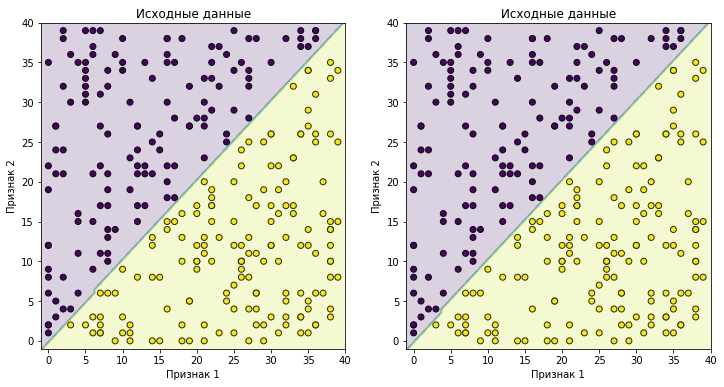

In [279]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap='viridis', edgecolors='k', linewidth=1)
plt.title("Исходные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

xx, yy = np.meshgrid(np.linspace(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1, 100),
                     np.linspace(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1, 100))
Z = predict(np.c_[xx.ravel(), yy.ravel()], weights).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.xlim(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1)
plt.ylim(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1)

plt.subplot(1, 2, 2)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap='viridis', edgecolors='k', linewidth=1)
plt.title("Исходные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

Z_sklearn = sklearn_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z_sklearn, alpha=0.2, cmap='viridis')
plt.xlim(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1)
plt.ylim(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1)

plt.show()

In [280]:
def fit(x, y, lrn_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=1000):
    x = np.insert(x, 0, 1, axis=1)
    num_features = x.shape[1]
    w = np.zeros(num_features)
    
    m = np.zeros_like(w)  # Инициализация момента
    v = np.zeros_like(w)  # Инициализация скользящего среднего квадрата градиентов
    t = 0  # Счетчик итераций
    
    for _ in range(num_iterations):
        t += 1
        grad = gradient(w, x, y)
        
        # Обновление момента и скользящего среднего квадрата градиентов
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        
        # Коррекция bias на начальных шагах
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        
        # Обновление весов с использованием адаптивного learning rate
        w -= lrn_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    
    return w

In [281]:
X_data = np.random.randint(0, 40, (300, 2))
rows = np.where(X_data[:, 0] != X_data[:, 1])
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0] - elem[1]) == 1) for elem in X_data])

learning_rate = 0.1
num_iterations = 1000
weights = fit(X_data, y_data, lrn_rate=learning_rate, num_iterations=num_iterations)

print(weights)

accuracy_custom = score(X_data, y_data, weights)


sklearn_model = LogisticRegression(random_state=42)
sklearn_model.fit(X_data, y_data)

print(sklearn_model.intercept_,sklearn_model.coef_)

accuracy_sklearn = sklearn_model.score(X_data, y_data)

print(f"Точность: {accuracy_custom:.2f}")
print(f"Точность модели из scikit-learn: {accuracy_sklearn:.2f}")

[ 0.27690298  3.31562374 -3.32789397]
[0.40561077] [[ 1.77346113 -1.7908192 ]]
Точность: 1.00
Точность модели из scikit-learn: 1.00


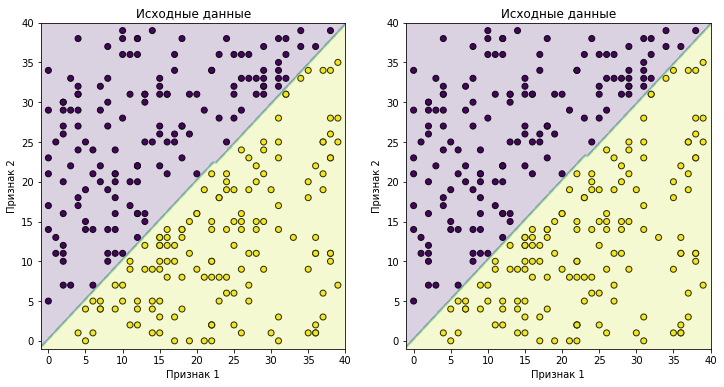

In [282]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap='viridis', edgecolors='k', linewidth=1)
plt.title("Исходные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

xx, yy = np.meshgrid(np.linspace(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1, 100),
                     np.linspace(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1, 100))
Z = predict(np.c_[xx.ravel(), yy.ravel()], weights).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.xlim(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1)
plt.ylim(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1)

plt.subplot(1, 2, 2)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap='viridis', edgecolors='k', linewidth=1)
plt.title("Исходные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

Z_sklearn = sklearn_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z_sklearn, alpha=0.2, cmap='viridis')
plt.xlim(X_data[:, 0].min() - 1, X_data[:, 0].max() + 1)
plt.ylim(X_data[:, 1].min() - 1, X_data[:, 1].max() + 1)

plt.show()

<font color = 'red' size = 5>Задание 3 </font>

Для каждого из подзаданий:

1. Проведите предварительную обработку данных.
2. Постройте модель классификации на основе метода логистической регрессии из встроенной библиотеки. 
3. Подберите оптимальные гиперпараметры модели используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей.
5. Используйте регуляризацию, где необходимо. Определите оптимальный коэффициент регуляризации. 
6. Оцените качество модели с помощью ROC-кривых.

[ROC](https://loginom.ru/blog/logistic-regression-roc-auc)


ROC-кривая показывает зависимость количества верно классифицированных положительных примеров от количества неверно классифицированных отрицательных примеров.

TP (True Positives) — верно классифицированные положительные примеры (так называемые истинно положительные случаи).

TN (True Negatives) — верно классифицированные отрицательные примеры (истинно отрицательные случаи).

FN (False Negatives) — положительные примеры, классифицированные как отрицательные (ошибка I рода). Это так называемый «ложный пропуск» — когда интересующее нас событие ошибочно не обнаруживается (ложно отрицательные примеры).

FP (False Positives) — отрицательные примеры, классифицированные как положительные (ошибка II рода). Это ложное обнаружение, т.к. при отсутствии события ошибочно выносится решение о его присутствии (ложно положительные случаи).

##### 3.1 Скоринг отказа от услуг оператора связи.

Используйте данные из файла [telecom.csv](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/code) для предсказания отказа от услуг связи. Столбец "churn". 
Предврительно изучите и подготовьте данные.

#####  3.2 Предсказание диабета у пациентов.

Используйте данные из файла [diabetes.csv](https://www.kaggle.com/datasets/saurabh00007/diabetescsv) для предсказания исхода для пациентов. Столбец "outcome". Предварительно изучите и подготовьте данные. 

#####  3.3 Данные теста микрочипов

Используйте данные из файла microchip_tests.txt для предсказания брака микрочипов. Предварительно изучите и подготовьте данные. 

In [110]:
data = pd.read_csv('telecom_output.csv')

In [111]:
data

account length  area code  international plan  voice mail plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             192        415                   0                1   
3329              68        415                   0                0   
3330              28        510                   0                0   
3331             184        510                   1                0   
3332              74        415                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6               2.67   
3329                 9.6              

In [215]:
data = pd.read_csv('telecom_output.csv')

X, y = data.drop(['churn'], axis=1), data['churn']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=2) 
X_std_poly2 = poly.fit_transform(X_std)

X_std_poly2.shape

(3333, 190)

In [216]:
from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(X_std_poly2, y, test_size=0.3,
random_state=17)

model_2 = LogisticRegression()
model_2.fit(X_train,y_train)

pred = model_2.predict(X_test)

accurancy = metrics.accuracy_score(y_test, pred)
accurancy

0.917

In [217]:
pred_proba = model_2.predict_proba(X_test)[::,1]
pred_proba

auc = metrics.roc_auc_score(y_test, pred_proba)
auc

0.889021862615015

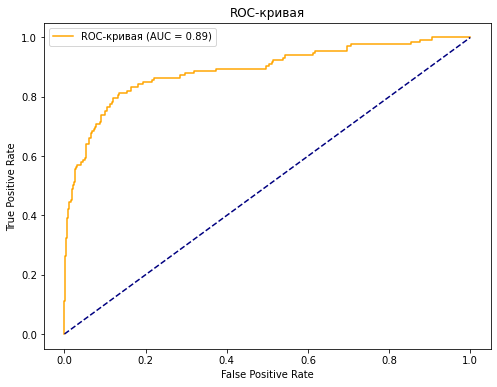

AUC-ROC: 0.89


In [218]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pred_proba = model_2.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

auc = roc_auc_score(y_test, pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC-кривая (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

print(f'AUC-ROC: {auc:.2f}')


#### diabetes

In [160]:
data_d = pd.read_csv('diabetes.csv')

In [161]:
data_d.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [162]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [163]:
data_d.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

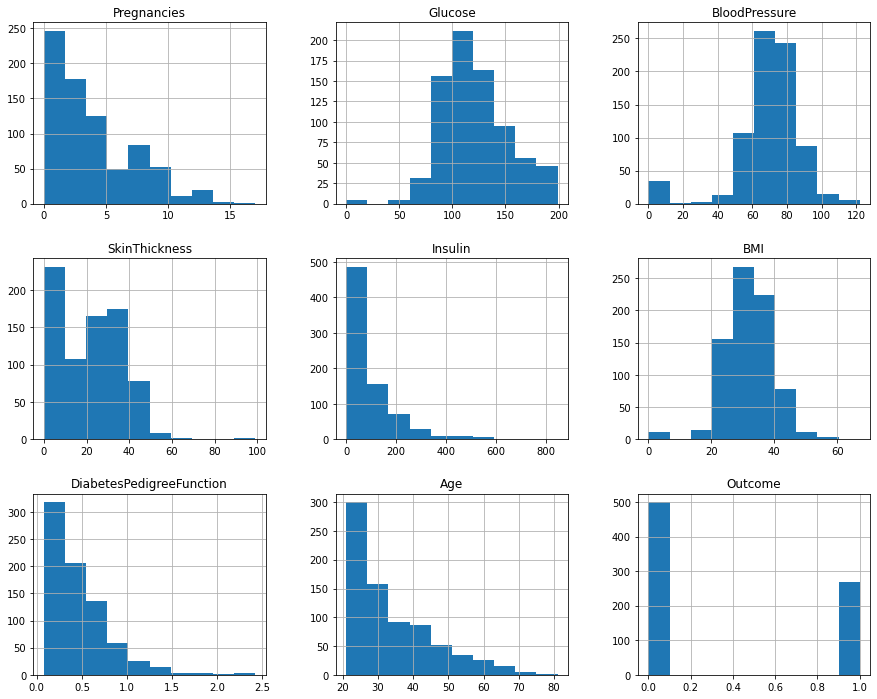

In [165]:
data_d.hist(figsize=(15,12))
plt.show()

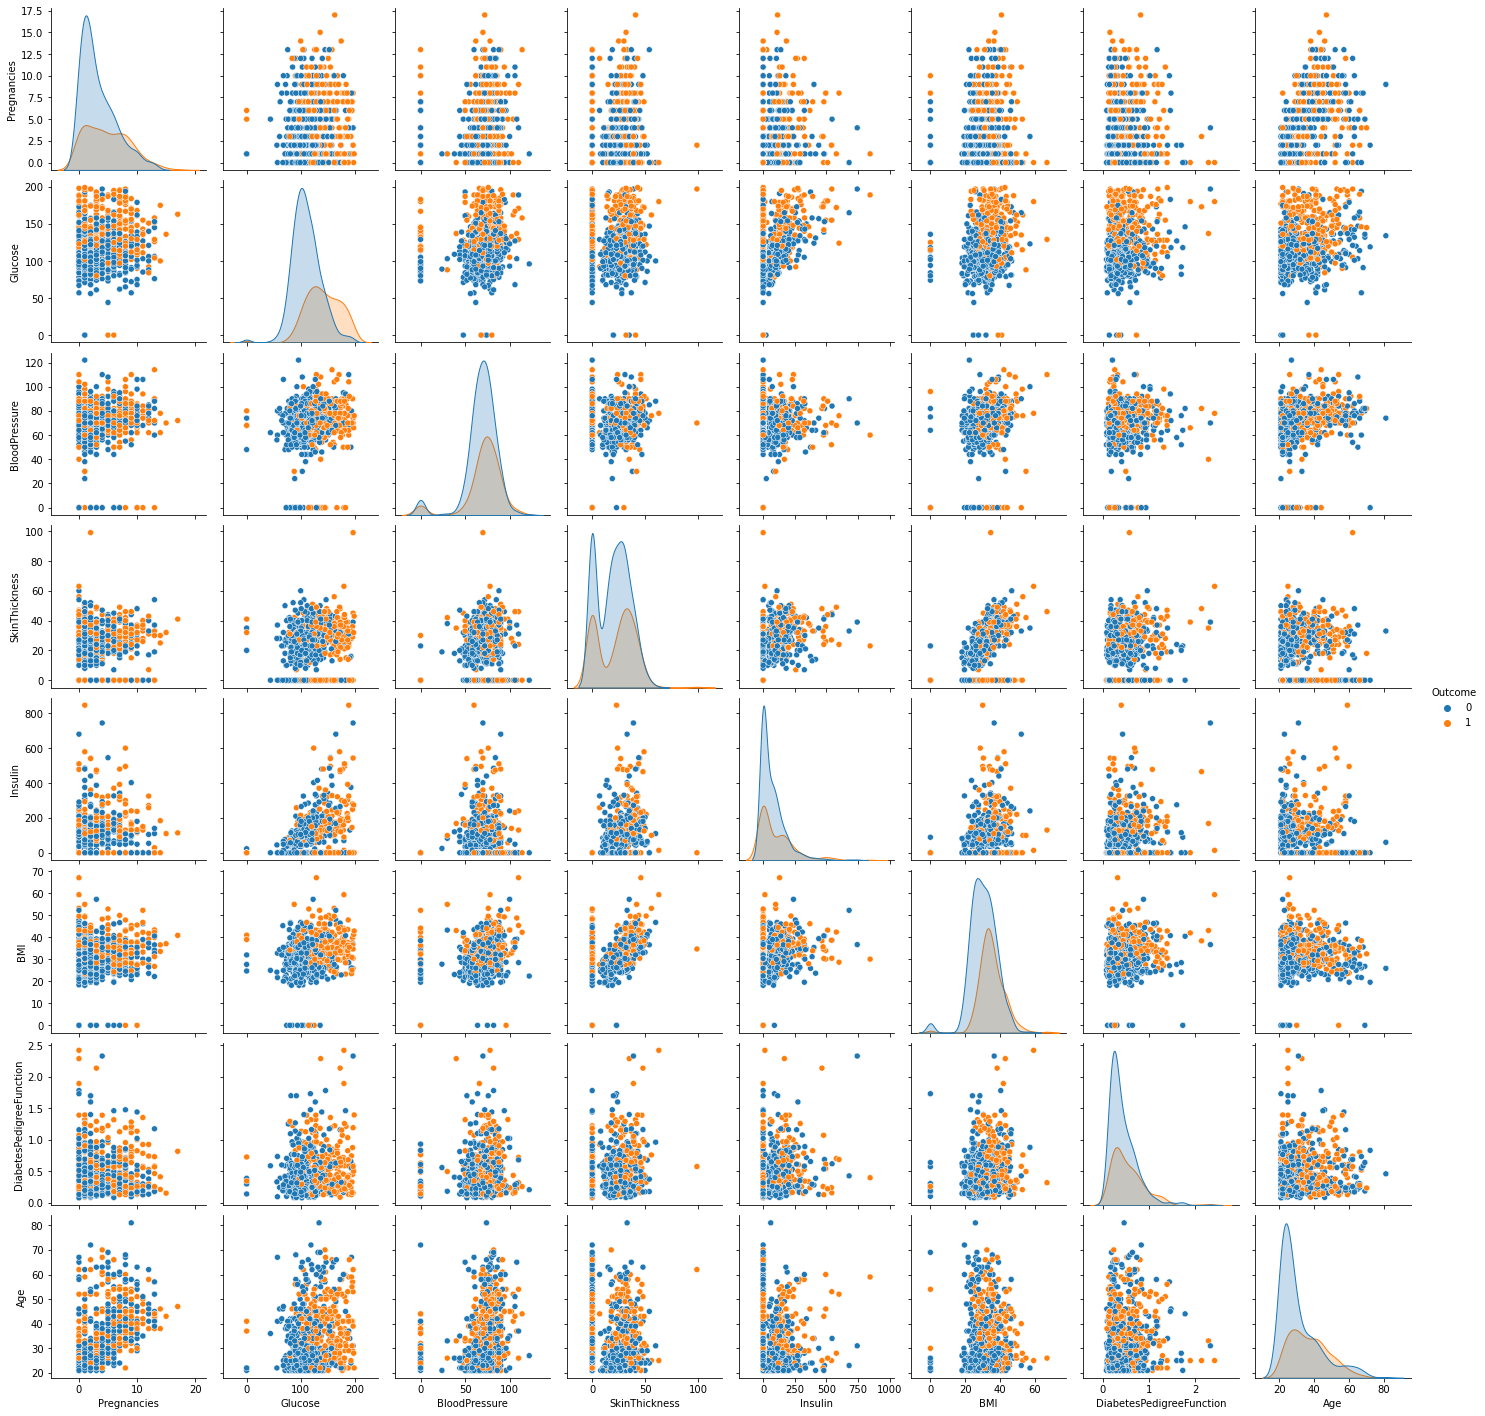

In [166]:
sns.pairplot(data=data_d, hue='Outcome')

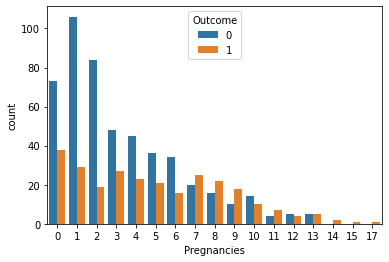

In [168]:
sns.countplot(data=data_d, x='Pregnancies', hue='Outcome')
plt.show()

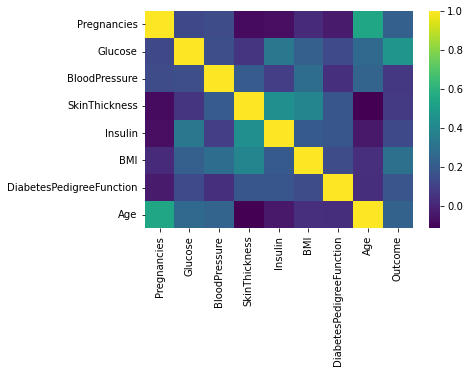

In [169]:
sns.heatmap(data_d.corr()[:-1], cmap="viridis")
plt.show()

In [171]:
data_d.corrwith(data_d['SkinThickness'])

Pregnancies                -0.081672
Glucose                     0.057328
BloodPressure               0.207371
SkinThickness               1.000000
Insulin                     0.436783
BMI                         0.392573
DiabetesPedigreeFunction    0.183928
Age                        -0.113970
Outcome                     0.074752
dtype: float64

In [172]:
data_d.corrwith(data_d['Glucose'])

Pregnancies                 0.129459
Glucose                     1.000000
BloodPressure               0.152590
SkinThickness               0.057328
Insulin                     0.331357
BMI                         0.221071
DiabetesPedigreeFunction    0.137337
Age                         0.263514
Outcome                     0.466581
dtype: float64

In [173]:
data_d.corrwith(data_d['Insulin'])

Pregnancies                -0.073535
Glucose                     0.331357
BloodPressure               0.088933
SkinThickness               0.436783
Insulin                     1.000000
BMI                         0.197859
DiabetesPedigreeFunction    0.185071
Age                        -0.042163
Outcome                     0.130548
dtype: float64

In [191]:
X, y = data_d.drop(['Outcome'], axis=1), data_d['Outcome']

scaler = StandardScaler()

X_std = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=2) 
X_std_poly2 = poly.fit_transform(X_std)

X_std_poly2.shape

(768, 45)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_std_poly2, y, test_size=0.3,
random_state=17)

model_3 = LogisticRegression(solver='sag')
model_3.fit(X_train,y_train)

pred = model_3.predict(X_test)

accurancy = metrics.accuracy_score(y_test, pred)
accurancy

0.7705627705627706

In [193]:
pred_proba = model_3.predict_proba(X_test)[::,1]

auc = metrics.roc_auc_score(y_test, pred_proba)
auc

0.8352263374485596

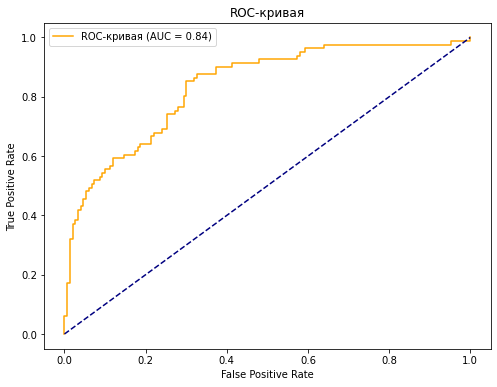

AUC-ROC: 0.84


In [194]:
pred_proba = model_3.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

auc = roc_auc_score(y_test, pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC-кривая (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

print(f'AUC-ROC: {auc:.2f}')


#### microchip_tests.txt

In [179]:
data_ch = pd.read_csv('microchip_tests.txt', sep=',', names=('X', 'Y', 'Target'))  

In [181]:
data_ch

X         Y  Target
0    0.051267  0.699560       1
1   -0.092742  0.684940       1
2   -0.213710  0.692250       1
3   -0.375000  0.502190       1
4   -0.513250  0.465640       1
..        ...       ...     ...
113 -0.720620  0.538740       0
114 -0.593890  0.494880       0
115 -0.484450  0.999270       0
116 -0.006336  0.999270       0
117  0.632650 -0.030612       0

[118 rows x 3 columns]

In [183]:
data_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       118 non-null    float64
 1   Y       118 non-null    float64
 2   Target  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


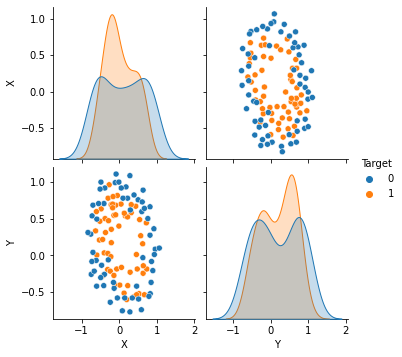

In [185]:
sns.pairplot(data=data_ch, hue='Target')

In [188]:
data_ch['Target'].value_counts()

0    60
1    58
Name: Target, dtype: int64

In [203]:
X, y = data_ch.drop(['Target'], axis=1), data_ch['Target']

scaler = StandardScaler()

X_std = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=4) 
X_std_poly2 = poly.fit_transform(X_std)

X_std_poly2.shape

(118, 15)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X_std_poly2, y, test_size=0.3,
random_state=17)

model_3 = LogisticRegression()
model_3.fit(X_train,y_train)

pred = model_3.predict(X_test)

accurancy = metrics.accuracy_score(y_test, pred)
accurancy

0.7222222222222222

In [214]:
pred_proba = model_3.predict_proba(X_test)[::,1]

auc = metrics.roc_auc_score(y_test, pred_proba)
auc

0.828125

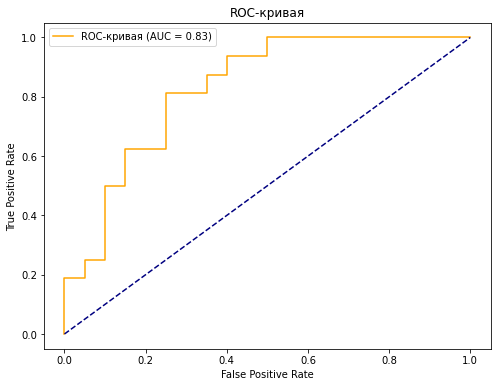

AUC-ROC: 0.83


In [206]:
pred_proba = model_3.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

auc = roc_auc_score(y_test, pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC-кривая (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

print(f'AUC-ROC: {auc:.2f}')

In [ ]:
градиентный спуск с переменным шагом